Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

Importing classes

In [2]:
#CMAB
from Strategies.CLinUCB import CLinUCB
from Strategies.LinUCB                    import LinUCB
from Strategies.LinUCBGlobal              import LinUCBGlobal
#Rewards
from Strategies.Rewards.BernoulliFeature   import BernoulliFeature

Init Parameters

In [3]:
iterations = 10000
experimentos = 10
k = 10
d = 2
alpha = 0.3
user_amount = 100
max_prob = 0.3
noise = 0.3
cluster_amount = 2

sup_percentile = 75
inf_percentile = 25

Init

In [4]:
reward_class = BernoulliFeature(k, d,user_amount,cluster_amount, max_prob, noise)

In [5]:
# Run experiments
linucb_regrets              = np.zeros((experimentos,iterations))
linucb_g_regrets              = np.zeros((experimentos,iterations))
linucb_cluster_regrets       = np.zeros((experimentos,iterations))
# Run experiments
for i in range(experimentos):
    print('exp: ' + str(i + 1) + '/' + str(experimentos))

    linucb       = LinUCB(k, iterations, reward_class, d, user_amount, alpha )
    linucbg      = LinUCBGlobal(k, iterations, reward_class, d, user_amount, alpha )
    linucbc      = CLinUCB(k, iterations, reward_class, d, user_amount, alpha, cluster_amount )

    linucb_cluster_regrets[i]           = linucbc.run()
    linucb_regrets[i]                   = linucb.run()
    linucb_g_regrets[i]                   = linucbg.run()


exp: 1/10
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
exp: 2/10
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
exp: 3/10
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
exp: 4/

In [6]:
#linucb
linucb_inf            = np.percentile(linucb_regrets,inf_percentile ,axis=0)
linucb_median_rew     = np.median(linucb_regrets,axis=0)
linucb_sup            = np.percentile(linucb_regrets,sup_percentile ,axis=0)

linucb_g_inf            = np.percentile(linucb_g_regrets,inf_percentile ,axis=0)
linucb_g_median_rew     = np.median(linucb_g_regrets,axis=0)
linucb_g_sup            = np.percentile(linucb_g_regrets,sup_percentile ,axis=0)

linucb_c_inf            = np.percentile(linucb_cluster_regrets,inf_percentile ,axis=0)
linucb_c_median_rew     = np.median(linucb_cluster_regrets,axis=0)
linucb_c_sup            = np.percentile(linucb_cluster_regrets,sup_percentile ,axis=0)


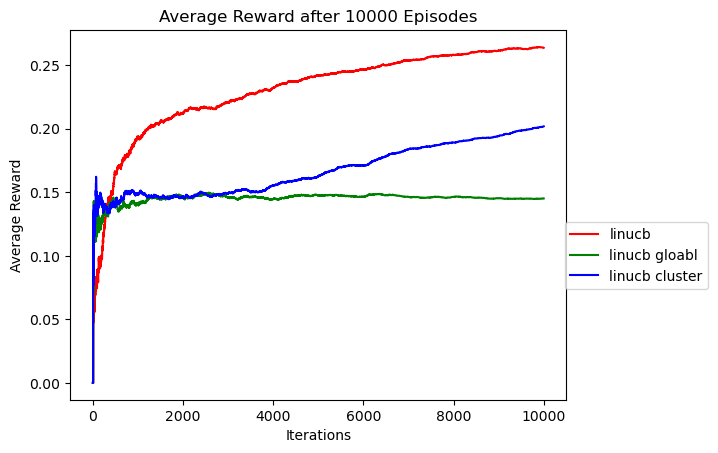

In [7]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(linucb_median_rew,label="linucb", color='red')
plt.plot(linucb_g_median_rew,label="linucb gloabl", color='green')
plt.plot(linucb_c_median_rew,label="linucb cluster", color='blue')

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Reward after " + str(iterations)
    + " Episodes")
#plt.ylim(0,0.1)
plt.show()


In [8]:
max_prob = np.zeros(user_amount)
for i in range(user_amount):
    max_prob[i] = np.max(reward_class.get_probabilities(i))
print(max_prob)
print(np.average(max_prob))

[0.29959076 0.29988308 0.29997794 0.29995229 0.29977175 0.29986554
 0.29976118 0.29980323 0.29975668 0.29990235 0.29994748 0.29985843
 0.29982817 0.29969613 0.29973048 0.29994063 0.29980001 0.29995071
 0.29989112 0.29992911 0.29993921 0.29987446 0.29988815 0.29985568
 0.2998096  0.29983833 0.29992203 0.29981556 0.29974956 0.29989025
 0.29978899 0.29979301 0.29971979 0.29992284 0.29992758 0.29977303
 0.29983822 0.29990629 0.29982785 0.29982011 0.29990843 0.29993694
 0.29985799 0.29996689 0.2999894  0.29985572 0.29981907 0.29957877
 0.29987274 0.29978337 0.29794282 0.2983195  0.29806323 0.29763646
 0.29790628 0.29730844 0.29781522 0.29801458 0.297727   0.29764663
 0.29810564 0.29790222 0.29757375 0.29781008 0.29674136 0.29727163
 0.29762649 0.29821359 0.29778043 0.29760792 0.2975106  0.29785903
 0.29821642 0.29772778 0.2979272  0.29807047 0.29767006 0.29783518
 0.29765606 0.29818072 0.29833311 0.29805144 0.29765304 0.29796627
 0.29823613 0.29716416 0.29745575 0.29791445 0.29729825 0.2977

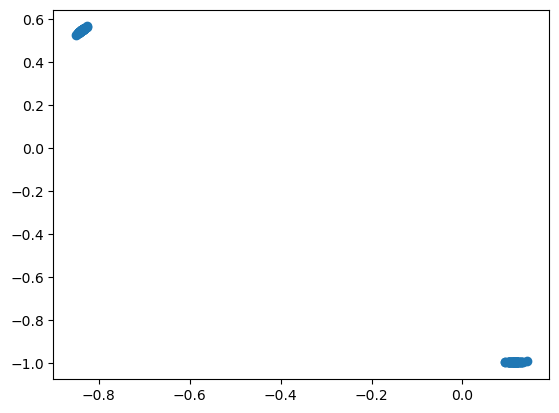

In [9]:
reward_class.graph()

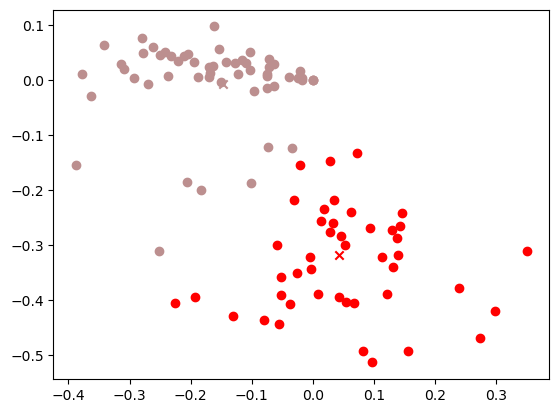

In [10]:
linucbc.get_kmeans().graph()